In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [27]:
ingreso_df = pd.read_csv('../data/raw/Ingresos .csv')
poblacion_df = pd.read_csv('../data/raw/Penetración-poblacion.csv')
total_acc_tecno_df = pd.read_csv('../data/raw/Totales Accesos por Tecnología.csv')

In [35]:
poblacion_df

np.int64(0)

In [29]:
poblacion_df.isnull().sum()
ingreso_df.isnull().sum()
total_acc_tecno_df.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [30]:
print(ingreso_df.duplicated().sum())
print(total_acc_tecno_df.duplicated().sum())
print(poblacion_df.duplicated().sum())

0
0
0


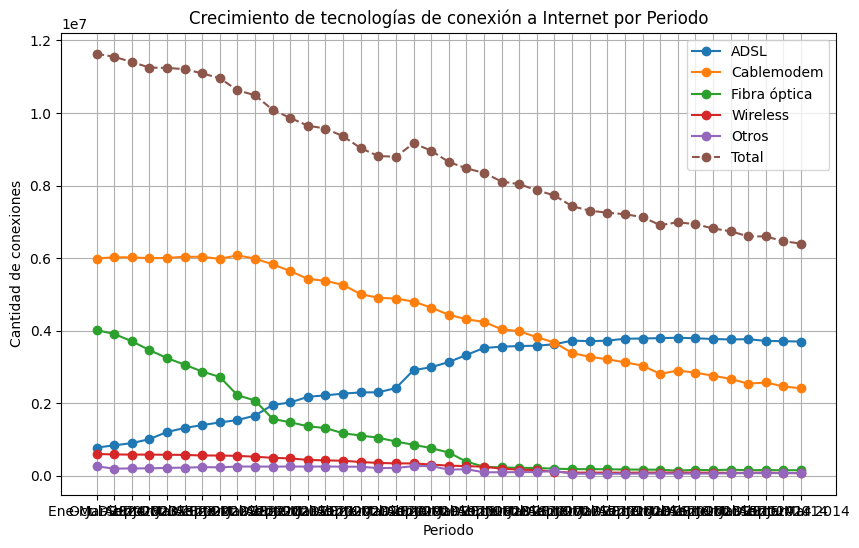

In [31]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Gráfico para cada tecnología
plt.plot(total_acc_tecno_df['Periodo'], total_acc_tecno_df['ADSL'], marker='o', label='ADSL')
plt.plot(total_acc_tecno_df['Periodo'], total_acc_tecno_df['Cablemodem'], marker='o', label='Cablemodem')
plt.plot(total_acc_tecno_df['Periodo'], total_acc_tecno_df['Fibra óptica'], marker='o', label='Fibra óptica')
plt.plot(total_acc_tecno_df['Periodo'], total_acc_tecno_df['Wireless'], marker='o', label='Wireless')
plt.plot(total_acc_tecno_df['Periodo'], total_acc_tecno_df['Otros'], marker='o', label='Otros')
plt.plot(total_acc_tecno_df['Periodo'], total_acc_tecno_df['Total'], marker='o', label='Total', linestyle='--')

# Personalización del gráfico
plt.title('Crecimiento de tecnologías de conexión a Internet por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de conexiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

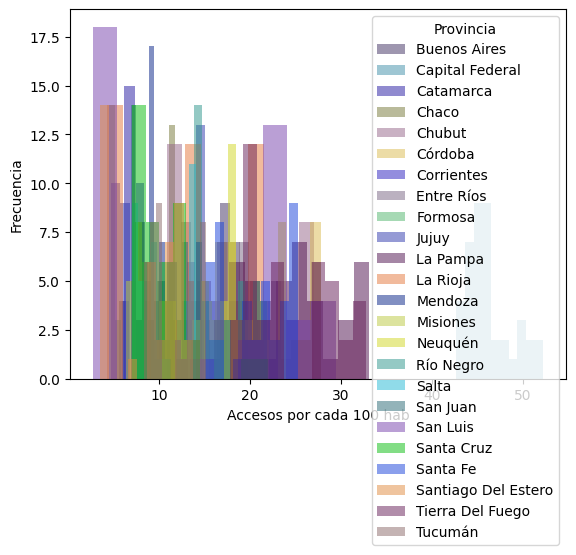

In [38]:
# poblacion_df['Año-Trimestre'] = poblacion_df['Año'].astype(str) + ' Q' + poblacion_df['Trimestre'].astype(str)

# # Crear el gráfico
# plt.figure(figsize=(12, 8))

# # Hacer un gráfico de líneas para cada provincia
# for provincia in poblacion_df['Provincia'].unique():
#     provincia_data = poblacion_df[poblacion_df['Provincia'] == provincia]
#     plt.plot(provincia_data['Año-Trimestre'], provincia_data['Accesos por cada 100 hab'], marker='o', label=provincia)

# # Personalización del gráfico
# plt.title('Evolución de los Accesos a Internet por cada 100 habitantes')
# plt.xlabel('Año y Trimestre')
# plt.ylabel('Accesos por cada 100 habitantes')
# plt.legend(title='Provincia')
# plt.grid(True)

# # Mostrar el gráfico
# plt.show()
# Generar colores aleatorios para cada provincia
unique_provinces = poblacion_df['Provincia'].unique()
colors = {province: f'#{random.randint(0, 0xFFFFFF):06x}' for province in unique_provinces}

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear un histograma para cada provincia
for province in unique_provinces:
    province_data = poblacion_df[poblacion_df['Provincia'] == province]['Accesos por cada 100 hab']
    ax.hist(province_data, bins=10, alpha=0.5, color=colors[province], label=province)

# Etiquetas y leyenda
ax.set_xlabel('Accesos por cada 100 hab')
ax.set_ylabel('Frecuencia')
ax.legend(title='Provincia')

# Mostrar la gráfica
plt.show()